# Data Import
We use pandas to inspect the curated data obtained from kaggle

In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler

In [3]:
#%cd Downloads/
!ls

FW_Veg_Rem_Combined.csv                 Wild Fire Analysis and Prediction.ipynb
FW_Veg_Rem_description.txt


In [4]:
df_raw = pd.read_csv('FW_Veg_Rem_Combined.csv', delimiter=',')
df_raw.dataframeName = 'FW_Veg_Rem_Combined'
nRow, nCol = df_raw.shape
print(f'There are {nRow} rows and {nCol} columns')
df_raw.info()

There are 55367 rows and 43 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55367 entries, 0 to 55366
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      55367 non-null  int64  
 1   Unnamed: 0        55367 non-null  int64  
 2   fire_name         25913 non-null  object 
 3   fire_size         55367 non-null  float64
 4   fire_size_class   55367 non-null  object 
 5   stat_cause_descr  55367 non-null  object 
 6   latitude          55367 non-null  float64
 7   longitude         55367 non-null  float64
 8   state             55367 non-null  object 
 9   disc_clean_date   55367 non-null  object 
 10  cont_clean_date   27477 non-null  object 
 11  discovery_month   55367 non-null  object 
 12  disc_date_final   28708 non-null  object 
 13  cont_date_final   25632 non-null  object 
 14  putout_time       27477 non-null  object 
 15  disc_date_pre     55367 non-null  object 
 16  disc

In [5]:
df_raw.head()

,Unnamed: 0.1,Unnamed: 0,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [6]:
# list(df_raw)
df_raw.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fire_name', 'fire_size',
       'fire_size_class', 'stat_cause_descr', 'latitude', 'longitude', 'state',
       'disc_clean_date', 'cont_clean_date', 'discovery_month',
       'disc_date_final', 'cont_date_final', 'putout_time', 'disc_date_pre',
       'disc_pre_year', 'disc_pre_month', 'wstation_usaf', 'dstation_m',
       'wstation_wban', 'wstation_byear', 'wstation_eyear', 'Vegetation',
       'fire_mag', 'weather_file', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype='object')

In [7]:
nunique = df_raw.nunique().to_dict()
print(nunique)

{'Unnamed: 0.1': 55367, 'Unnamed: 0': 55367, 'fire_name': 21793, 'fire_size': 6092, 'fire_size_class': 6, 'stat_cause_descr': 13, 'latitude': 46329, 'longitude': 49044, 'state': 51, 'disc_clean_date': 8114, 'cont_clean_date': 7078, 'discovery_month': 12, 'disc_date_final': 27835, 'cont_date_final': 24011, 'putout_time': 297, 'disc_date_pre': 8114, 'disc_pre_year': 25, 'disc_pre_month': 12, 'wstation_usaf': 2220, 'dstation_m': 54009, 'wstation_wban': 1570, 'wstation_byear': 82, 'wstation_eyear': 28, 'Vegetation': 7, 'fire_mag': 6, 'weather_file': 11314, 'Temp_pre_30': 35523, 'Temp_pre_15': 34038, 'Temp_pre_7': 32670, 'Temp_cont': 22414, 'Wind_pre_30': 35028, 'Wind_pre_15': 33381, 'Wind_pre_7': 31247, 'Wind_cont': 21918, 'Hum_pre_30': 34352, 'Hum_pre_15': 32852, 'Hum_pre_7': 31142, 'Hum_cont': 21589, 'Prec_pre_30': 2654, 'Prec_pre_15': 1683, 'Prec_pre_7': 1079, 'Prec_cont': 2369, 'remoteness': 54195}


# Exploratory Analysis
1. We display the histogram or distribution for unique values of each column. For simplicity, only columns that have less than 100 unique values will be plotted.
2. We display the correlation heat map and their values.
3. We also display the scatter plot of the pairwise features.

In [8]:
print(df_raw.keys())
# print(list(df_title))
# df_raw.info()
# df_raw['disc_clean_date'].head()
# xxx clean_date: formatted date
# xxx date_pre: 30 days prior to clean_date
# xxx date_final: formatted date + time
feature_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'disc_date_pre', 'disc_pre_year', 'disc_pre_month', 'wstation_usaf', 'dstation_m', 'wstation_wban', 'wstation_byear', 'wstation_eyear']
df_raw.drop(columns = feature_drop, inplace=True, axis =1)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fire_name', 'fire_size',
       'fire_size_class', 'stat_cause_descr', 'latitude', 'longitude', 'state',
       'disc_clean_date', 'cont_clean_date', 'discovery_month',
       'disc_date_final', 'cont_date_final', 'putout_time', 'disc_date_pre',
       'disc_pre_year', 'disc_pre_month', 'wstation_usaf', 'dstation_m',
       'wstation_wban', 'wstation_byear', 'wstation_eyear', 'Vegetation',
       'fire_mag', 'weather_file', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7',
       'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30',
       'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype='object')


In [9]:
df_raw.head()

,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [10]:
# figure out the dimension of the scatter plot array
df_temp = df_raw.select_dtypes(include =[np.number])
df_temp = df_temp.dropna(axis = 1)
df_temp = df_temp[[col for col in df_temp if df_temp[col].nunique() > 1]]
nRow, nCol = df_temp.shape

print(f'There are {nRow} rows and {nCol} columns')
print(list(df_temp))

# select only the following feature
feature_select = ['fire_size', 'latitude', 'longitude', 'Vegetation', 'Temp_pre_7', 'Wind_pre_7', 'Hum_pre_7', 'Prec_pre_7']
print([col for col in feature_select if df_raw[col].nunique() > 1])

There are 55367 rows and 22 columns
['fire_size', 'latitude', 'longitude', 'Vegetation', 'fire_mag', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30', 'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness']
['fire_size', 'latitude', 'longitude', 'Vegetation', 'Temp_pre_7', 'Wind_pre_7', 'Hum_pre_7', 'Prec_pre_7']


In [11]:
# figure out the scale of 'fire_mag'
df_temp['fire_mag'] = df_temp['fire_mag'].astype('float')
df_temp['fire_size'] = df_temp['fire_size'].astype('float')
fire_mag_list = df_temp['fire_mag'].unique().tolist()
fire_mag_list.sort()

print(f'Fire_mag = {fire_mag_list} is scales of the magnitude of the fire_size that help to distribute the mean of each group evenly.')
mag_range = []
for mag_order in fire_mag_list:
    mag_range.append([df_temp[df_temp['fire_mag'] == mag_order]['fire_size'].min(),
                  df_temp[df_temp['fire_mag'] == mag_order]['fire_size'].max()])
print(mag_range)

Fire_mag = [0.1, 1.0, 3.0, 10.0, 50.0, 100.0] is scales of the magnitude of the fire_size that help to distribute the mean of each group evenly.
[[0.51, 9.95], [10.0, 99.0], [100.0, 299.0], [300.0, 990.0], [1000.0, 4994.0], [5000.0, 606945.0]]


In [12]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 100]] # only display column that has less than 100 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)): # verbose data
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()  # number
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0) # padding for main plot, and each sub-plot
    plt.show()

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis = 1) # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr() * 100
    # add values to the plot
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1, cmap = 'YlGnBu')
    plt.xticks(range(len(corr.columns)), corr.columns, fontsize = 14, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns, fontsize = 14)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat, fraction=0.046, pad=0.04)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


# Scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical data
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis = 1)
    # df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    df = df[[col for col in feature_select if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values * 100
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Crr = %.0f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='center', size=textSize, fontweight="bold")
    plt.suptitle('Scatter and Density Plot', size = 25)
    plt.show()

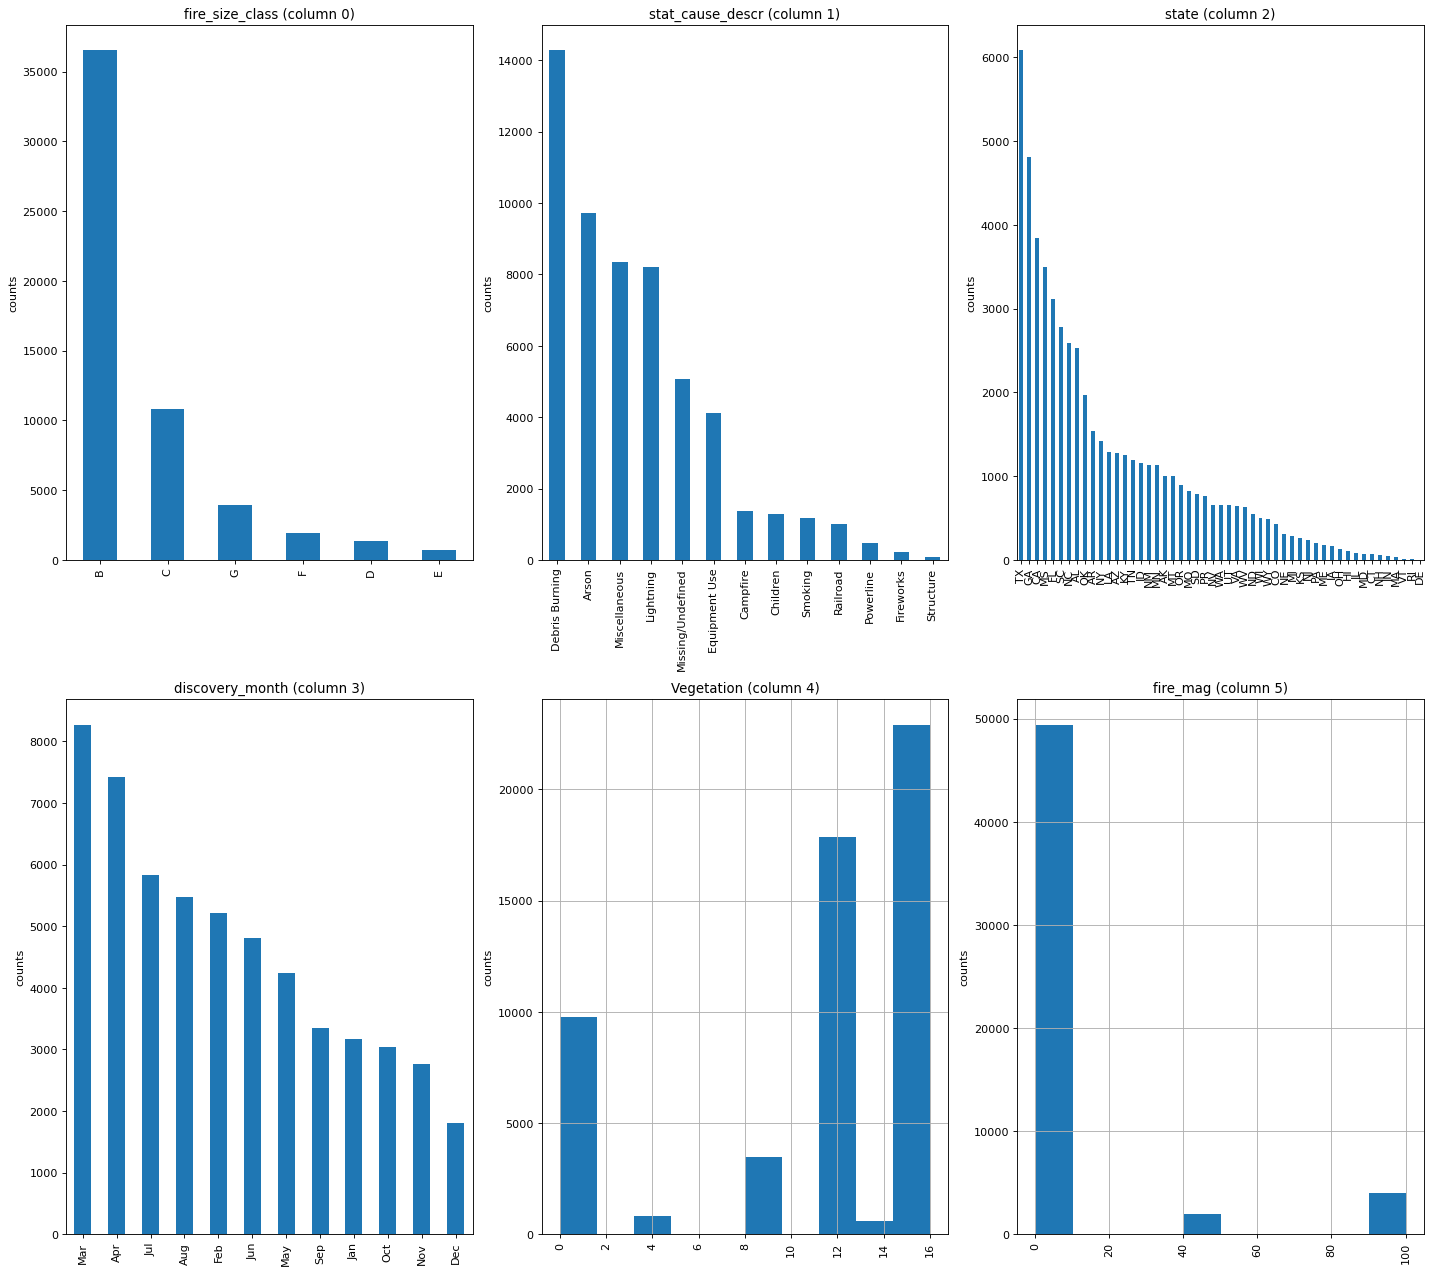

In [13]:
plotPerColumnDistribution(df_raw, 40, 3)

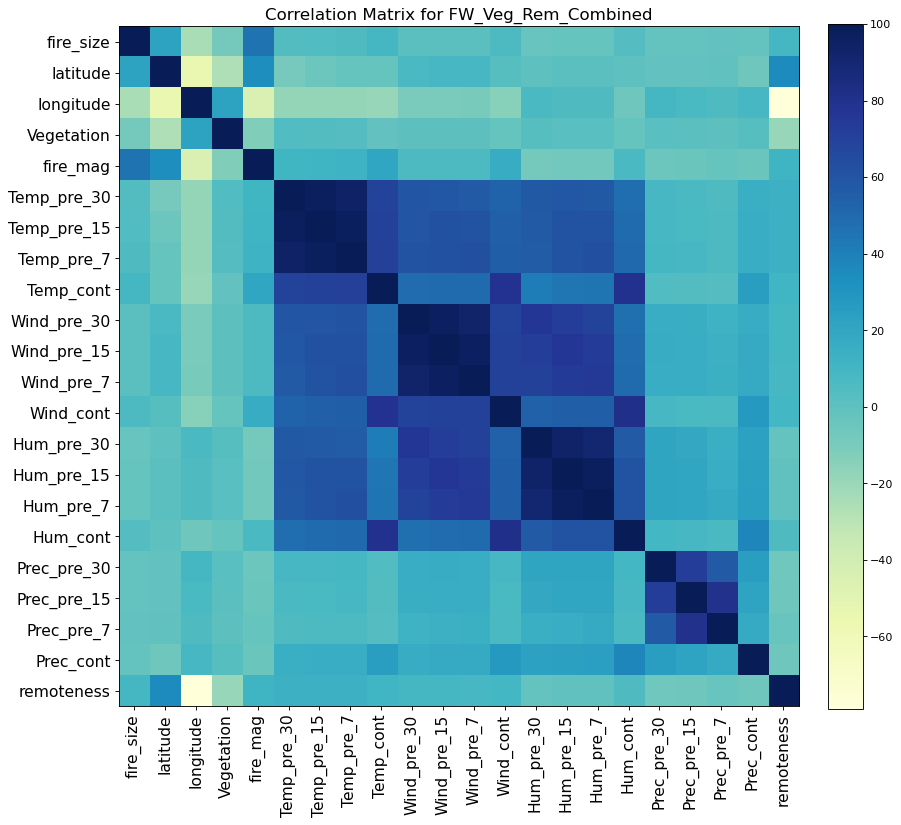

None


In [14]:
corr = plotCorrelationMatrix(df_raw, 12)
print(corr)

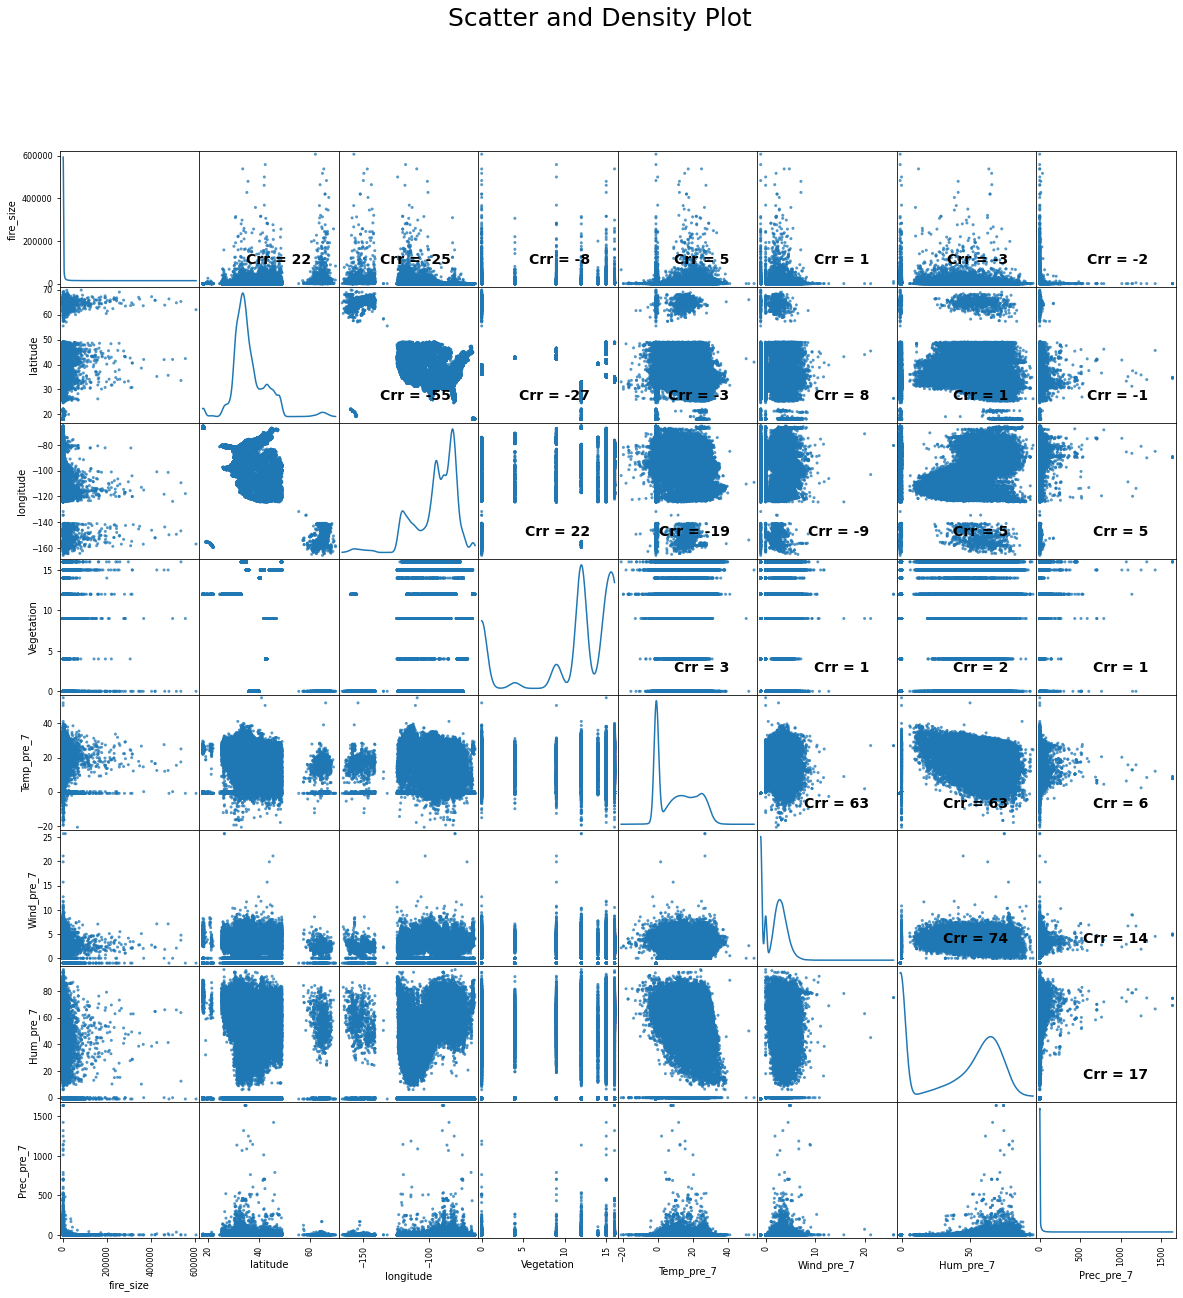

In [15]:
plotScatterMatrix(df_raw, 20, 14)

# Data cleaning and Testing and Training

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# remove row if all values are NA
df_data = df_raw.dropna(axis = 1, how='all').copy()
df_data = df_data[[col for col in df_raw if df_raw[col].nunique() > 1]]

In [18]:
df_data.drop(labels = 'fire_name', axis = 1, inplace = True)
df_data.replace('', np.nan, inplace = True)
df_data.dropna(inplace = True)

df_data['stat_cause_descr'] = df_data['stat_cause_descr'].astype('category')
# list the unique value of category
df_data['stat_cause_descr'].cat.categories
# create the dictionary for the category
dict_cause = dict(enumerate(df_data['stat_cause_descr'].cat.categories))
print(dict_cause)
# change category value into the key (int8)
df_data['stat_cause_descr'] = df_data['stat_cause_descr'].cat.codes

df_data.keys()

{0: 'Arson', 1: 'Campfire', 2: 'Children', 3: 'Debris Burning', 4: 'Equipment Use', 5: 'Fireworks', 6: 'Lightning', 7: 'Miscellaneous', 8: 'Missing/Undefined', 9: 'Powerline', 10: 'Railroad', 11: 'Smoking', 12: 'Structure'}


Index(['fire_size', 'fire_size_class', 'stat_cause_descr', 'latitude',
       'longitude', 'state', 'disc_clean_date', 'cont_clean_date',
       'discovery_month', 'disc_date_final', 'cont_date_final', 'putout_time',
       'Vegetation', 'fire_mag', 'weather_file', 'Temp_pre_30', 'Temp_pre_15',
       'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7',
       'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont',
       'Prec_pre_30', 'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype='object')

In [19]:
# feature engineering
def to_hour(hours):
    if 'days' in hours:
        i = hours.find('days')
        day = float(hours[0: i-1])
        hr = float(hours[i+5: i+7])
        min = float(hours[i+8: i+10])
        return 24*day+hr+min/60
    else:
        return float(hours)

df_data['putout_hours'] = df_data['putout_time'].apply(to_hour)

In [399]:
training_set, testing_set = train_test_split(df_data, train_size = 0.3, test_size = 0.1, random_state = 100)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7539 entries, 4903 to 35999
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fire_size         7539 non-null   float64
 1   fire_size_class   7539 non-null   object 
 2   stat_cause_descr  7539 non-null   object 
 3   latitude          7539 non-null   float64
 4   longitude         7539 non-null   float64
 5   state             7539 non-null   object 
 6   disc_clean_date   7539 non-null   object 
 7   cont_clean_date   7539 non-null   object 
 8   discovery_month   7539 non-null   object 
 9   disc_date_final   7539 non-null   object 
 10  cont_date_final   7539 non-null   object 
 11  putout_time       7539 non-null   object 
 12  Vegetation        7539 non-null   int64  
 13  fire_mag          7539 non-null   float64
 14  weather_file      7539 non-null   object 
 15  Temp_pre_30       7539 non-null   float64
 16  Temp_pre_15       7539 non-null   floa

In [115]:
df_data.shape

(25133, 33)

# Data Analysis

## Clustering

In [102]:
#!pip install yellowbrick

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from numpy import where
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

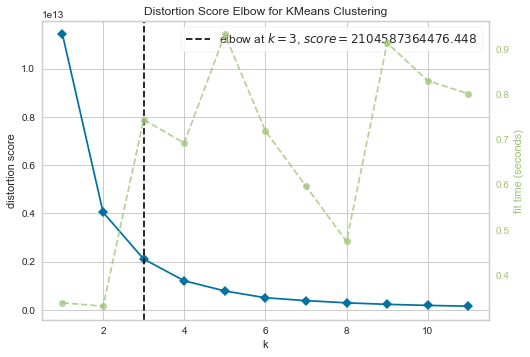

/var/folders/66/jmh_210j2pxgqhfy7brrb0fm0000gn/T/ipykernel_31156/3697391315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_Kmeans['K_means_labels'] = labels


In [251]:
# K means clustering
X_Kmeans = df_data[['fire_size', 'fire_size_class', 'stat_cause_descr', 'latitude', 'longitude', 'state', 'Vegetation', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'remoteness']]
X_Kmeans_2 = X_Kmeans.drop(['fire_size_class', 'stat_cause_descr', 'latitude', 'longitude', 'state'], axis=1)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(X_Kmeans_2) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

K = KMeans(n_clusters=3, random_state=0).fit(X_Kmeans_2)
labels = K.labels_
X_Kmeans['K_means_labels'] = labels

In [252]:
X_Kmeans.keys()

Index(['fire_size', 'fire_size_class', 'stat_cause_descr', 'latitude',
       'longitude', 'state', 'Vegetation', 'Temp_pre_30', 'Temp_pre_15',
       'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7',
       'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont',
       'remoteness', 'K_means_labels'],
      dtype='object')

Counter({0: 24547, 1: 508, 2: 78})


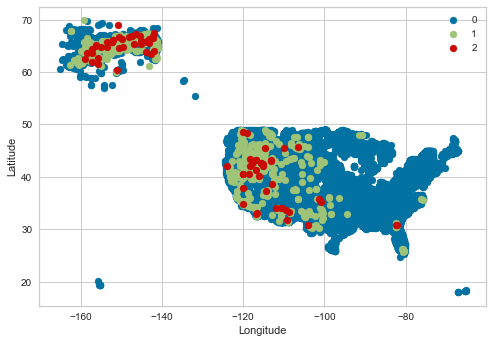

In [253]:
counter = Counter(labels)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    X_data = X_Kmeans[X_Kmeans['K_means_labels'] == label]['longitude']
    y_data = X_Kmeans[X_Kmeans['K_means_labels'] == label]['latitude']
    plt.scatter(X_data, y_data, label=str(label))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right')
plt.show()

In [254]:
# Plot fire size group in each class

df_temp = X_Kmeans[['K_means_labels', 'fire_size_class']].copy()
df_temp2 = df_temp.groupby('fire_size_class').value_counts().to_frame().unstack()
df_temp2.index.name = None
df_temp2.columns = ['0', '1', '2']
df_temp2.fillna(0, inplace = True)
df_temp2.head(10)

,0,1,2
B,14526.0,0.0,0.0
C,4630.0,0.0,0.0
D,714.0,0.0,0.0
E,414.0,0.0,0.0
F,1527.0,0.0,0.0
G,2736.0,508.0,78.0


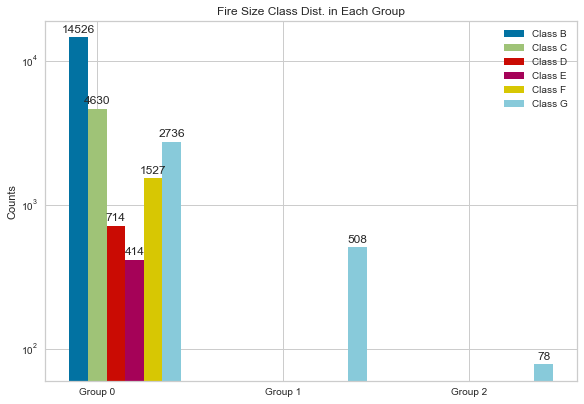

In [148]:
x_class = np.arange(len(counter.keys()))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained')

for index, row in df_temp2.iterrows():
    offset = width * multiplier
    bars = ax.bar(x_class + offset, list(row), width, label = 'Class ' + index)
    ax.bar_label(bars, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Fire Size Class Dist. in Each Group')
ax.set_xticks(x_class + width, ['Group 0', 'Group 1', 'Group 2'])
ax.legend(loc='upper right')
ax.set_yscale('log')
#ax.set_ylim(0, 16000)

plt.show()

In [255]:
# Plot cause in each class
print(dict_cause)

df_temp = X_Kmeans[['K_means_labels', 'stat_cause_descr']].copy()
df_temp2 = df_temp.groupby('stat_cause_descr').value_counts().to_frame().unstack()
df_temp2.index.name = None
df_temp2.columns = ['0', '1', '2']
df_temp2.fillna(0, inplace = True)
df_temp2.head(15)

{0: 'Arson', 1: 'Campfire', 2: 'Children', 3: 'Debris Burning', 4: 'Equipment Use', 5: 'Fireworks', 6: 'Lightning', 7: 'Miscellaneous', 8: 'Missing/Undefined', 9: 'Powerline', 10: 'Railroad', 11: 'Smoking', 12: 'Structure'}


,0,1,2
0,4789.0,20.0,3.0
1,726.0,15.0,2.0
2,542.0,0.0,0.0
3,5598.0,7.0,0.0
4,1312.0,17.0,2.0
5,190.0,0.0,0.0
6,5715.0,387.0,63.0
7,3601.0,36.0,6.0
8,1054.0,15.0,2.0
9,291.0,5.0,0.0


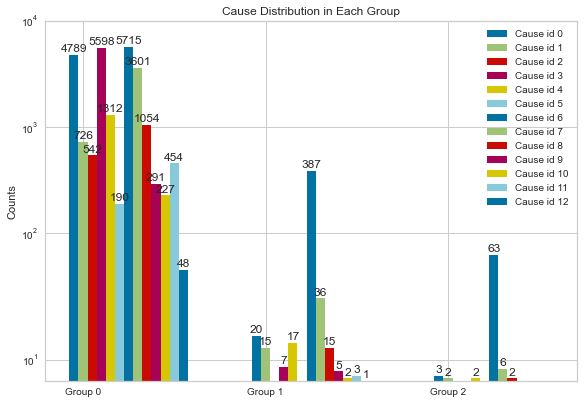

In [198]:
x_class = np.arange(len(counter.keys()))  # the label locations
width = 0.05  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained')

for index, row in df_temp2.iterrows():
    offset = width * multiplier
    bars = ax.bar(x_class + offset, list(row), width, label = 'Cause id ' + str(index))
    ax.bar_label(bars, padding = 1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Cause Distribution in Each Group')
ax.set_xticks(x_class + width, ['Group 0', 'Group 1', 'Group 2'])
ax.legend(loc='upper right')
ax.set_yscale('symlog', base = 10, linthresh = 50)
ax.set_ylim(1, 10000)

plt.show()

In [256]:
# Plot vegetation in each class

df_temp = X_Kmeans[['K_means_labels', 'Vegetation']].copy()
df_temp2 = df_temp.groupby('Vegetation').value_counts().to_frame().unstack()
df_temp2.index.name = None
df_temp2.columns = ['0', '1', '2']
df_temp2.fillna(0, inplace = True)
df_temp2.head(15)

,0,1,2
0,4568,204,42
4,638,18,3
9,2300,77,9
12,5710,35,5
14,353,8,1
15,6008,133,11
16,4970,33,7


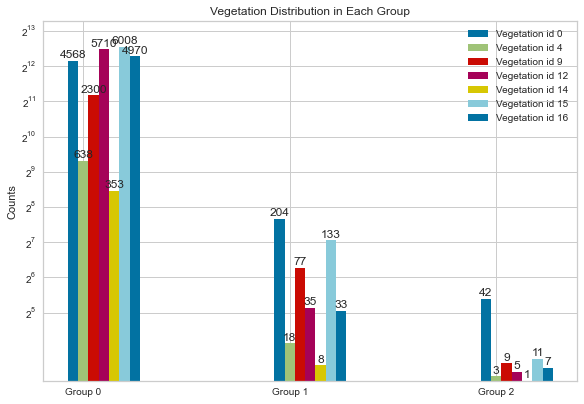

In [207]:
x_class = np.arange(len(counter.keys()))  # the label locations
width = 0.05  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained')

for index, row in df_temp2.iterrows():
    offset = width * multiplier
    bars = ax.bar(x_class + offset, list(row), width, label = 'Vegetation id ' + str(index))
    ax.bar_label(bars, padding = 1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Vegetation Distribution in Each Group')
ax.set_xticks(x_class + width, ['Group 0', 'Group 1', 'Group 2'])
ax.legend(loc='upper right')
ax.set_yscale('symlog', base = 2, linthresh = 32)
ax.set_ylim(1, 10000)

plt.show()

## PCA Analysis

For the weather data, we use the PCA analysis to illustrate and analyze the pattern of each class. The first two principal components account for 80% of the variance. We plot the weather data in terms of 2 components. These 3 groups of weather data has a descending variance of the distribution from group 0 to group 2.

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [258]:
feature_PCA = ['Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont'] 

x = X_Kmeans[feature_PCA].values
x = StandardScaler().fit_transform(x)
y = X_Kmeans['K_means_labels'].values

In [259]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(x)

df_pca = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
df_pca['K_means_labels'] = y
print(pca.explained_variance_ratio_)

[0.60080798 0.18497172]


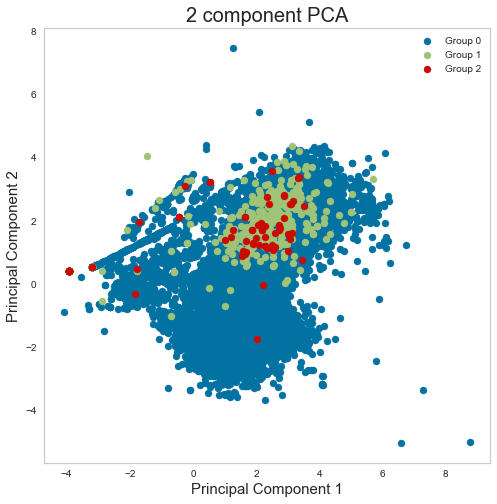

In [260]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Group 0', 'Group 1', 'Group 2']
colors = ['b', 'g', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = df_pca['K_means_labels'] == int(target[-1])
    ax.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Linear Regression

We select four features to build an emprical predictive model. All these feature have float data type. The small set of input value will avoid overfiting.

We test several input groups,
1. X = "Temp_pre_7", "Wind_pre_7", "Hum_pre_7", "Prec_pre_7"
2. X = "Temp_cont", "Wind_cont", "Hum_cont", "Prec_cont"

We intend to predict two features,
1. Y = "fire_size" or sqrt(fire_size) because area is quadratic in the length scale.
2. Y = "putout_time"

The model reveals a higher correlation in the sqrt(fire_size) predictive model of fire size and the input data. Non-linear regression may be considered to improve the predictability further.

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [137]:
# Model 1: Weather data from 7 days prior to the events
model = LinearRegression()
X = training_set[["Temp_pre_7", "Wind_pre_7", "Hum_pre_7", "Prec_pre_7"]]
Y = training_set["fire_size"]
print(model.fit(X, Y))
y_predict = model.predict(X)
mean_square = mean_squared_error(Y, y_predict)
R2 = model.score(X,Y)
print(f'R2 and Mean Squared Error: {model.score(X,Y)}, {mean_square}')

LinearRegression()
R2 and Mean Squared Error: 0.012354158795346959, 411829795.6008446


In [138]:
# Model 2: Weather data on the same date of the events
model = LinearRegression()
X = training_set[["Temp_pre_7", "Wind_pre_7", "Hum_pre_7", "Prec_pre_7", "Temp_cont", "Wind_cont", "Hum_cont", "Prec_cont"]]
Y = training_set["fire_size"]
print(model.fit(X, Y))
y_predict = model.predict(X)
mean_square = mean_squared_error(Y, y_predict)
R2 = model.score(X,Y)
print(f'R2 and Mean Squared Error: {model.score(X,Y)}, {mean_square}')

LinearRegression()
R2 and Mean Squared Error: 0.0566366772591369, 393364815.7803562


In [96]:
# Model 3: Weather data on the same date of the events to fit sqrt(fire_size)
model = LinearRegression()
X = training_set[["Temp_pre_7", "Wind_pre_7", "Hum_pre_7", "Prec_pre_7", "Temp_cont", "Wind_cont", "Hum_cont", "Prec_cont"]]
Y = training_set["fire_size"].apply(np.sqrt)
print(model.fit(X, Y))
y_predict = model.predict(X)
mean_square = mean_squared_error(Y, y_predict)
R2 = model.score(X,Y)
print(f'R2 and Mean Squared Error: {model.score(X,Y)}, {mean_square}')

LinearRegression()
R2 and Mean Squared Error: 0.20640341112575988, 2632.63943118167


The most correlated input data are the same-date weather data of these events.

Next, we predict the 'putout_time' by formatting it days. This feature has lots of zeros.

In [140]:
# Model 4: Weather data from 7 days prior to the events
model = LinearRegression()
X = training_set[["Temp_pre_7", "Wind_pre_7", "Hum_pre_7", "Prec_pre_7"]]
Y = training_set['putout_hours']
print(model.fit(X, Y))
y_predict = model.predict(X)
mean_square = mean_squared_error(Y, y_predict)
R2 = model.score(X,Y)
print(f'R2 and Mean Squared Error: {model.score(X,Y)}, {mean_square}')

LinearRegression()
R2 and Mean Squared Error: 0.003730079769387662, 41484.39556188734


In [143]:
# Model 5: Weather data on the same date of the events
model = LinearRegression()
X = training_set[["Temp_cont", "Wind_cont", "Hum_cont", "Prec_cont"]]
Y = training_set['putout_hours']
print(model.fit(X, Y))
y_predict = model.predict(X)
mean_square = mean_squared_error(Y, y_predict)
R2 = model.score(X,Y)
print(f'R2 and Mean Squared Error: {model.score(X,Y)}, {mean_square}')

LinearRegression()
R2 and Mean Squared Error: 0.13936794477265435, 35836.473517163846


## Use stats model to find out the most relavent features

We can use R-style regression model to diagnose the correlation of each regressor.

In [210]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [212]:
mod = sm.OLS.from_formula(formula = 'fire_size ~  Temp_pre_30 + Temp_pre_15 + Temp_pre_7 + Temp_cont + Wind_pre_30 + Wind_pre_15 + Wind_pre_7 + Wind_cont + Hum_pre_30 + Hum_pre_15 + Hum_pre_7 + Hum_cont + Prec_pre_30 + Prec_pre_15 + Prec_pre_7 + Prec_cont + remoteness', data = df_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              fire_size   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     80.75
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          5.43e-274
Time:                        23:52:36   Log-Likelihood:            -2.8549e+05
No. Observations:               25133   AIC:                         5.710e+05
Df Residuals:                   25115   BIC:                         5.712e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2860.1303    325.453      8.788      

P > |t| is the possitiblity that null hypothesis is true. We set \alpha = 0.05. Feature with P < \alpha is significant. Thus, we throw Temp_pre_15, Wind_pre_30, Wind_pre_15, Wind_pre_7, Wind_cont, Hum_pre_30, Hum_pre_15, Prec_pre_30, Prec_pre_15, Prec_pre_7

With a low R^2 score and high AIC, BIC, and a low F-test score, the linear regression might not be the best model for prediction.

In [218]:
mod = sm.OLS.from_formula(formula = 'fire_size ~  Temp_pre_30 + Temp_pre_7 + Temp_cont + Hum_pre_7 + Hum_cont + Prec_cont + remoteness', data = df_data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              fire_size   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     194.6
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          2.49e-282
Time:                        18:19:11   Log-Likelihood:            -2.8550e+05
No. Observations:               25133   AIC:                         5.710e+05
Df Residuals:                   25125   BIC:                         5.711e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2940.9679    304.454      9.660      

# Classification

We'll use the 7-days prior and the same-date weather data to predict the fire_size_class.

## Decision Tree

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

In [206]:
X = training_set[['Temp_pre_7', 'Wind_pre_7', 'Hum_pre_7', 'Prec_pre_7', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont']]
Y = training_set['fire_size_class']

tree_model = DecisionTreeClassifier().fit(X,Y)
y_pred = tree_model.predict(X)
confusion_mat = confusion_matrix(Y, y_pred)
print('Confusion Matrix:')
print(confusion_mat)
print('Classification Metrics')
print(f'Accuracy: {accuracy_score(Y, y_pred)}, F1 Score: {f1_score(Y, y_pred, average="weighted")}')
print(f'Precision: {precision_score(Y, y_pred, average="weighted")}, Sensitivity: {recall_score(Y, y_pred, average="weighted")}')

Confusion Matrix:
[[4373    0    0    0    0    0]
 [ 459  922    0    0    0    0]
 [  60    0  137    0    0    0]
 [  38    1    0   92    0    0]
 [ 127    1    0    0  329    1]
 [ 246    1    1    1    5  745]]
Classification Metrics
Accuracy: 0.8751823849316885, F1 Score: 0.8700456142326511
Precision: 0.8962177840208236, Sensitivity: 0.8751823849316885


In [207]:
# validation
X = testing_set[['Temp_pre_7', 'Wind_pre_7', 'Hum_pre_7', 'Prec_pre_7', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont']]
Y = testing_set['fire_size_class']
y_pred = tree_model.predict(X)
print('Classification Metrics')
print(f'Accuracy: {accuracy_score(Y, y_pred)}, F1 Score: {f1_score(Y, y_pred, average="weighted")}')
print(f'Precision: {precision_score(Y, y_pred, average="weighted")}, Sensitivity: {recall_score(Y, y_pred, average="weighted")}')

Classification Metrics
Accuracy: 0.5326173428798727, F1 Score: 0.5092899524288939
Precision: 0.49568453538643575, Sensitivity: 0.5326173428798727


## Random Forest Classification

In [331]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [208]:
X = training_set[['Temp_pre_7', 'Wind_pre_7', 'Hum_pre_7', 'Prec_pre_7', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont']]
Y = training_set['fire_size_class']

model = RandomForestClassifier()
print(model.fit(X,Y))
y_pred = model.predict(X)
print("Confusion Metrix: ")
print(confusion_matrix(Y, y_pred))
print('Classification Metrics')
print(f'Accuracy: {accuracy_score(Y, y_pred)}, F1 Score: {f1_score(Y, y_pred, average="weighted")}')
print(f'Precision: {precision_score(Y, y_pred, average="weighted")}, Sensitivity: {recall_score(Y, y_pred, average="weighted")}')

RandomForestClassifier()
Confusion Metrix: 
[[4369    4    0    0    0    0]
 [ 455  925    0    1    0    0]
 [  60    0  137    0    0    0]
 [  38    0    0   92    0    1]
 [ 127    1    0    0  326    4]
 [ 246    1    1    0    2  749]]
Classification Metrics
Accuracy: 0.8751823849316885, F1 Score: 0.8701046310943581
Precision: 0.8957537569651558, Sensitivity: 0.8751823849316885


In [209]:
# validation
X = testing_set[['Temp_pre_7', 'Wind_pre_7', 'Hum_pre_7', 'Prec_pre_7', 'Temp_cont', 'Wind_cont', 'Hum_cont', 'Prec_cont']]
Y = testing_set['fire_size_class']
y_pred = tree_model.predict(X)
print('Classification Metrics')
print(f'Accuracy: {accuracy_score(Y, y_pred)}, F1 Score: {f1_score(Y, y_pred, average="weighted")}')
print(f'Precision: {precision_score(Y, y_pred, average="weighted")}, Sensitivity: {recall_score(Y, y_pred, average="weighted")}')

Classification Metrics
Accuracy: 0.5326173428798727, F1 Score: 0.5092899524288939
Precision: 0.49568453538643575, Sensitivity: 0.5326173428798727


# XGBoost Regression and Classification

In [ ]:
#!pip install xgboost
#!pip install graphviz
#!brew install graphviz

In [43]:
# AUC score: 0 ~ 1 for classification, 1 is the best
# cross_val_score: cross validation score
# GridSearchCV: Exhaustive search for specified parameter values for a estimator
# RandomizedSearchCV: Randomized search on hyper parameters
# k fold: split the training data to k folds

from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import graphviz

def display_scores(scores):
    print("Scores: {0}\nMin: {1:.3f}\nLocation: {2:.3f}".format(scores, min(scores), int(scores.index(min(scores)))))

## XGB Regression

We build the model to predict the fire_size. XGBoost can fit both the float and categorical data. From the result, we can see it's much more effective than the linear regression.

In [28]:
df_data['Vegetation'] = df_data['Vegetation'].astype('category')
X = df_data[["Temp_pre_7", "Wind_pre_7", "Hum_pre_7", "Prec_pre_7", "Temp_cont", "Wind_cont", "Hum_cont", "Prec_cont", "Vegetation"]]
y = df_data['fire_size']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [29]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators = 5000, random_state = 42, enable_categorical = True)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_train)

# metric 
R2 = xgb_model.score(X_train,y_train)
print(f'R2 and Mean Squared Error: {R2}, {mean_squared_error(y_train, y_pred)}')

R2 and Mean Squared Error: 0.7276615956330122, 128910889.2852824


Search for the best hyperparameters

In [36]:
xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # iteration for boost, default 100
    "subsample": uniform(0.6, 0.4),
    "enable_categorical": [True]
}

search = RandomizedSearchCV(xgb_model, param_distributions = params, random_state = 40, n_iter = 500, cv = 3, verbose = 1, n_jobs = 1, return_train_score = True, scoring = 'r2')

search.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x15b7c7bb0>,
                       

In [37]:
print(f'R2 and Mean Squared Error: {R2}, {mean_squared_error(y_train, y_pred)}')

R2 and Mean Squared Error: 0.7276615956330122, 128910889.2852824


In [38]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
				# return the i-th candidate regarding 'rank_test_score'
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
						# print each candidate in the rank (i-th), their validatin score and params
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.091 (std: 0.027)
Parameters: {'colsample_bytree': 0.7161223148450951, 'enable_categorical': True, 'gamma': 0.2793031202578726, 'learning_rate': 0.031471896568535454, 'max_depth': 5, 'n_estimators': 113, 'subsample': 0.9468570381486344}



Now we use the cross validation to determined the best result

In [351]:
kfold = KFold(n_splits = 5, shuffle = True)
R2 = []
scores = []
mse_cv = []

for i, (train_index, test_index) in enumerate(kfold.split(X)):   
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

		# model, verbose: only print the metric for every 250
    xgb_model = xgb.XGBRegressor(objective = "reg:squarederror", 
                                 n_estimators = 5000, 
                                 random_state = 42, 
                                 enable_categorical = True, 
                                 #eval_metric="rmse"
                                 colsample_bytree = 0.8834541132597041,
                                 gamma = 0.04079709020012018,
                                 learning_rate = 0.03155545883219603,
                                 max_depth = 5,
                                 subsample = 0.6777095814048169
                                 )
    xgb_model.fit(X_train, y_train, 
                  #early_stopping_rounds = 1000, 
                  #eval_set=[(X_test, y_test)], 
                  verbose = 250)
    #xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_train)
    y_validation = xgb_model.predict(X_test)
		# metric
    R2.append(xgb_model.score(X_train, y_train))
    scores.append(mean_squared_error(y_train, y_pred))
    mse_cv.append(mean_squared_error(y_test, y_validation))

    
# user defined print for metric
print(f'R2: {R2}')
display_scores(scores)
display_scores(mse_cv)

R2: [0.6655293897477463, 0.6853606827306404, 0.7010924754088377, 0.7114413456531195, 0.6836989056424592]
Scores: [156621740.4597178, 129639108.61105299, 131695656.64318803, 138684839.78472587, 148447461.74941322]
Min: 129639108.611
Location: 1.000
Scores: [347606851.5926018, 567208317.721747, 478649091.3996211, 345304064.2564191, 337336611.06312335]
Min: 337336611.063
Location: 4.000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

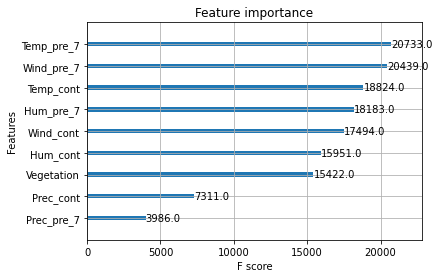

In [352]:
# importance of each feature
xgb.plot_importance(xgb_model)

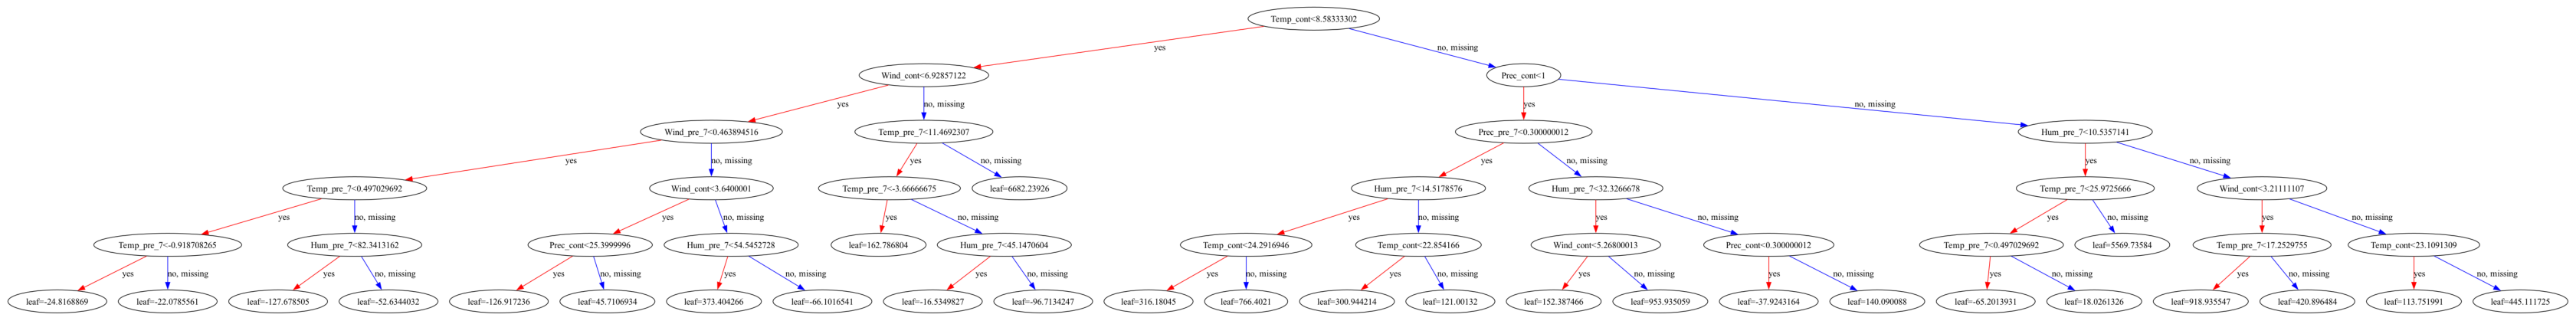

In [383]:
fig, ax = plt.subplots(figsize=(60, 60))
xgb.plot_tree(xgb_model, ax = ax)
plt.show()

## XGBoost Classification

In [77]:
from sklearn.utils import class_weight

# df_data['Vegetation'] = df_data['Vegetation'].astype('category')
df_data['fire_size_class'] = df_data['fire_size_class'].astype('category')

# X = df_data[["Temp_pre_7", "Wind_pre_7", "Hum_pre_7", "Prec_pre_7", "Temp_cont", "Wind_cont", "Hum_cont", "Prec_cont"]]
X = df_data[['Vegetation', 'fire_mag', 'Temp_pre_30', 'Temp_pre_15',
       'Temp_pre_7', 'Temp_cont', 'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7',
       'Wind_cont', 'Hum_pre_30', 'Hum_pre_15', 'Hum_pre_7', 'Hum_cont',
       'Prec_pre_30', 'Prec_pre_15', 'Prec_pre_7', 'Prec_cont', 'remoteness']].copy()
X['Vegetation'] = X['Vegetation'].astype('category')
# y = df_data['fire_size_class'].cat.codes
y = df_data['fire_size_class']
y_encoded = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state = 50)

# define class weight
classes_weights = class_weight.compute_sample_weight(
    class_weight = 'balanced',
    y = y_train
)

In [87]:
# default hyperparameter, eval_metric = 'aucpr' for imbalanced dataset

classes_weights = list(classes_weights)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", n_estimators = 5000, random_state = 40, enable_categorical = True, eval_metric = 'aucpr')
xgb_model.fit(X_train, y_train, sample_weight = classes_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [88]:
y_pred = xgb_model.predict(X_train) 

cf_matrix = confusion_matrix(y_train, y_pred)
print('Confusion Matrix:')
print(cf_matrix)
print('Classification Metrics')
print(f'Accuracy: {accuracy_score(y_train, y_pred)}, F1 Score: {f1_score(y_train, y_pred, average="weighted")}')
print(f'Precision: {precision_score(y_train, y_pred, average="weighted")}, Sensitivity: {recall_score(y_train, y_pred, average="weighted")}')

Confusion Matrix:
[[10861     0     0     0     0     0]
 [    0  3499     0     0     0     0]
 [    0     0   542     0     0     0]
 [    0     0     0   316     0     0]
 [    0     0     0     0  1165     0]
 [    0     0     0     0     0  2466]]
Classification Metrics
Accuracy: 1.0, F1 Score: 1.0
Precision: 1.0, Sensitivity: 1.0


In [89]:
# test data
y_pred = xgb_model.predict(X_test) 

cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cf_matrix)
print('Classification Metrics')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}, F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}, Sensitivity: {recall_score(y_test, y_pred, average="weighted")}')

Confusion Matrix:
[[3665    0    0    0    0    0]
 [   0 1131    0    0    0    0]
 [   0    0  172    0    0    0]
 [   0    0    0   98    0    0]
 [   0    0    0    0  362    0]
 [   0    0    0    0    0  856]]
Classification Metrics
Accuracy: 1.0, F1 Score: 1.0
Precision: 1.0, Sensitivity: 1.0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

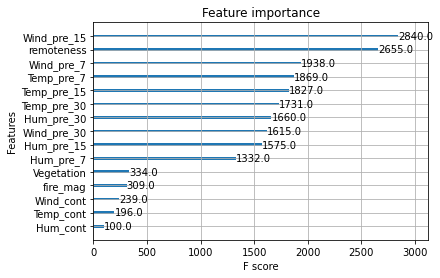

In [90]:
xgb.plot_importance(xgb_model)

Optimize hyperparameters

In [457]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", enable_categorical = True)

params = {
    "n_estimators": randint(1000, 5000), 
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # iteration for boost, default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions = params, random_state = 42, scoring='roc_auc', n_iter = 200, cv = 3, verbose = 1, n_jobs = 1, return_train_score = True)

search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x28d8c61f0>,
            

In [458]:
report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.628 (std: 0.002)
Parameters: {'colsample_bytree': 0.7498850106268238, 'gamma': 0.3690168082131852, 'learning_rate': 0.054839600377537934, 'max_depth': 5, 'n_estimators': 125, 'subsample': 0.6272998821416366}



# Prediction of Fire Incidence by Month

We use ARIMA model to analyze the fire occurance by month

In [484]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

In [604]:
def adfuller_test(t):
    if t[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary.")
    else:
        print("Data it is non-stationary.")
    results = pd.DataFrame(index = ['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
    results['value']['Test Statistic Value'] = t[0]
    results['value']['p-value'] = t[1]
    results['value']['Lags Used'] = t[2]
    results['value']['Number of Observations Used'] = t[3]
    results['value']['Critical Value(1%)'] = t[4]['1%']
    results['value']['Critical Value(5%)'] = t[4]['5%']
    results['value']['Critical Value(10%)'] = t[4]['10%']
    return results

## Extract Time-series of fire occurence

In [535]:
# sort date
df_data = df_data.sort_values('disc_clean_date')
# create 'year' and 'month'
df_data['disc_clean_date'] = pd.to_datetime(df_data['disc_clean_date'], format='%m/%d/%Y')
df_data['disc_year'] = df_data['disc_clean_date'].dt.year
df_data['disc_month'] = df_data['disc_clean_date'].dt.month

df_ts = df_data[['disc_year', 'disc_month']].copy()
year_i = df_ts['disc_year'].min()
year_f = df_ts['disc_year'].max()
month_i = df_ts[df_ts['disc_year'] == 1992]['disc_month'].min()
month_f = df_ts[df_ts['disc_year'] == 2015]['disc_month'].max()
print(f'We will plot fire incidence ranges from {month_i}/{year_i} to {month_f}/{year_f}.')

# discard the original 'shuffled' index
df_ts = df_ts.reset_index(drop = True)
# group by year, month information; count the incidence
df_ts = df_ts.groupby(['disc_year', 'disc_month']).value_counts().to_frame()
# flatten the year and month index
df_ts.reset_index(inplace = True)
df_ts.rename(columns = {0: 'Counts'}, inplace = True)
# Make the month data into datetime format '%m%d%y'ARIMA
df_ts['disc_month'] = df_ts.apply(lambda row: str(row['disc_year']) + '-' + str(row['disc_month']) + '-' + '1', axis = 1)
df_ts.drop('disc_year', inplace = True, axis = 1)
# Select the monthly date as index for time-series
df_ts['disc_month'] = pd.to_datetime(df_ts['disc_month'], format='%Y/%m/%d')
df_ts.set_index('disc_month', inplace = True)
df_ts.head()

We will plot fire incidence ranges from 1/1992 to 12/2015.


,Counts
disc_month,
1992-01-01,50
1992-02-01,132
1992-03-01,160
1992-04-01,129
1992-05-01,129


## Direct approach

We used the time series directly in ARIMA. First we need to identify the parameters (p, d, q) which account for **seasonality, trend, and noise** in datasets.
- p is the auto-regressive param of the model. It measures the effect of past values.
- d is the integrated param of the model. This includes terms in the model that incorporate the order of differencing of the past values.
- q is the moving average param of the model, which is the weighted average (linear combination) of the error values in the past.



### Identify the order of differencing

The series doesn't become smooth after taking the difference. d is likely 0.

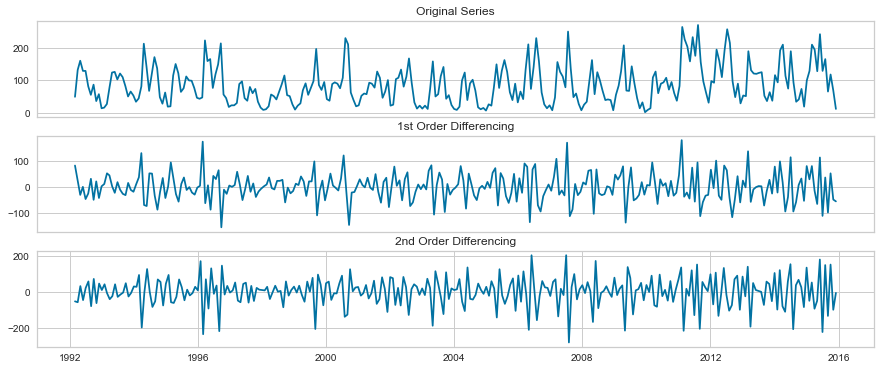

In [536]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_ts['Counts'])
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_ts['Counts'].diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_ts['Counts'].diff().diff())
ax3.set_title('2nd Order Differencing')
plt.show()

### Adfuller test
- H0: The time-series is non-stationary. ADF test strongly reject the null hypothesis so the time-series is stationary.

In [673]:
# ADF test

t = adfuller(df_ts['Counts'], autolag='AIC')
adfuller_test(t)

Reject the null hypothesis. Data is stationary.


,value
Test Statistic Value,-3.427771
p-value,0.010048
Lags Used,15
Number of Observations Used,272
Critical Value(1%),-3.454622
Critical Value(5%),-2.872225
Critical Value(10%),-2.572464


In [674]:
# First-order difference
t = adfuller(df_ts['Counts'].diff().dropna(), autolag='AIC')

adfuller_test(t)

Reject the null hypothesis. Data is stationary.


,value
Test Statistic Value,-4.720526
p-value,0.000077
Lags Used,14
Number of Observations Used,272
Critical Value(1%),-3.454622
Critical Value(5%),-2.872225
Critical Value(10%),-2.572464


### ACF and PACF, Order parameters of ARIMA(p,d,q)

For d=0, PACF gives p = 2 (2nd lag), ACF gives q = 3. We use data from 01/01/2001 to 12/01/2012 to fit the ARIMA formula. Then we predict the monthly occurence of 2013. We have searched for the best order parameters for the model and the result indicates that the regular ARIMA doesn't perform well on seasonal series.

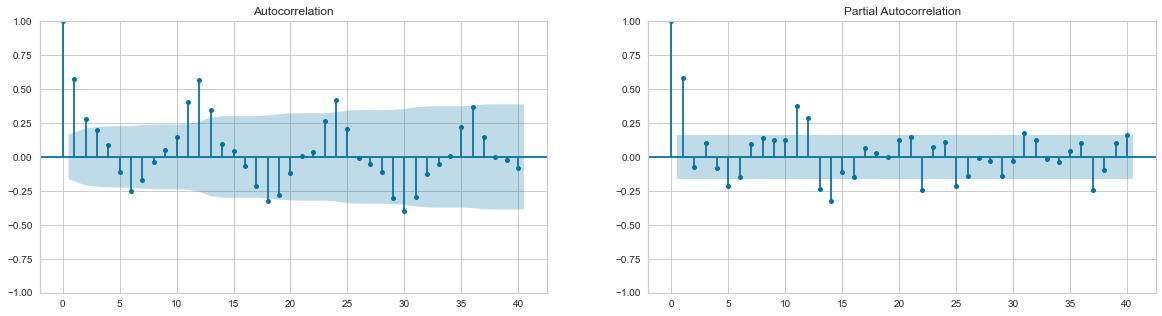

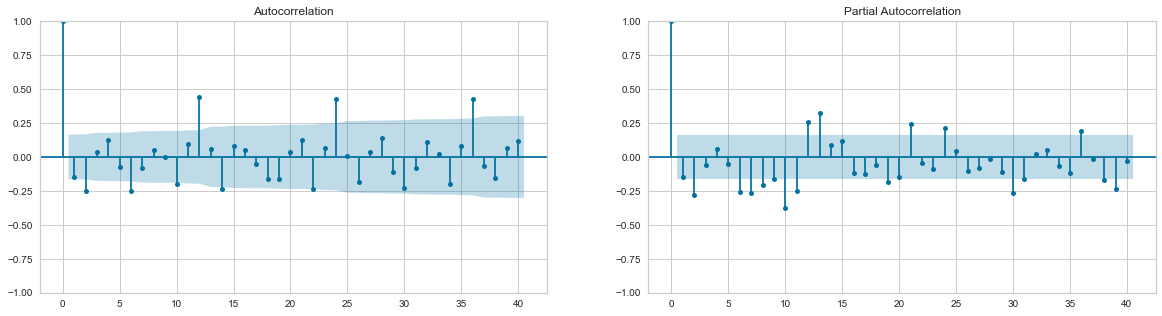

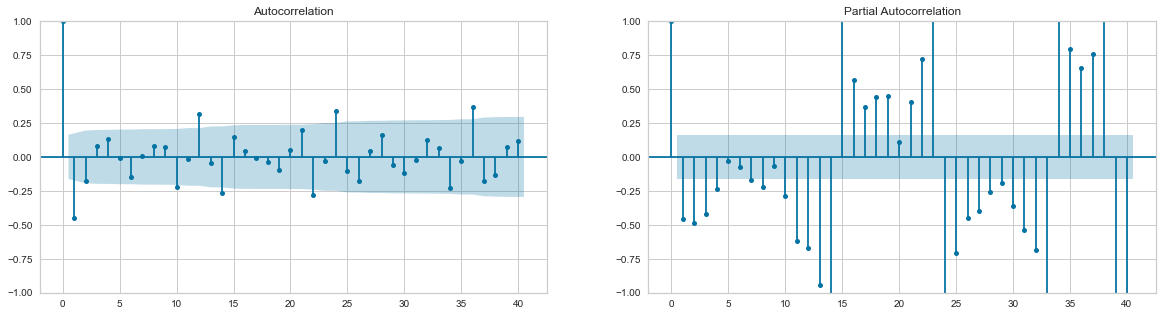

In [642]:
dti = pd.to_datetime("2001-01-01")
dtf = pd.to_datetime("2012-12-01")

# Autocorrelation and partial autocorrelation
lag_acf = acf(df_ts['Counts'].loc[dti: dtf], nlags = 20)
lag_pacf = pacf(df_ts['Counts'].loc[dti: dtf], nlags = 20, method = 'ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df_ts['Counts'].loc[dti: dtf], lags = 40, ax = axes[0])
plot_pacf(df_ts['Counts'].loc[dti: dtf], lags = 40, ax = axes[1])
plt.show()

#First-order difference
lag_acf = acf(df_ts['Counts'].diff().loc[dti: dtf], nlags = 20)
lag_pacf = pacf(df_ts['Counts'].diff().loc[dti: dtf], nlags = 20, method = 'ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df_ts['Counts'].diff().loc[dti: dtf], lags = 40, ax = axes[0])
plot_pacf(df_ts['Counts'].diff().loc[dti: dtf], lags = 40, ax = axes[1])
plt.show()

#Second-order difference
lag_acf = acf(df_ts['Counts'].diff().diff().loc[dti: dtf], nlags = 20)
lag_pacf = pacf(df_ts['Counts'].diff().diff().loc[dti: dtf], nlags = 20, method = 'ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df_ts['Counts'].diff().diff().loc[dti: dtf], lags = 40, ax = axes[0])
plot_pacf(df_ts['Counts'].diff().diff().loc[dti: dtf], lags = 40, ax = axes[1])
plt.show()

In [671]:
dti = pd.to_datetime("2001-01-01")
dtf = pd.to_datetime("2012-12-01")

model=ARIMA(df_ts['Counts'].loc[dti: dtf], order = (3,0,4))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Counts   No. Observations:                  144
Model:                 ARIMA(3, 0, 4)   Log Likelihood                -751.879
Date:                Wed, 01 Nov 2023   AIC                           1521.758
Time:                        08:55:18   BIC                           1548.487
Sample:                    01-01-2001   HQIC                          1532.619
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.2397     10.888      8.012      0.000      65.899     108.580
ar.L1          0.6531      0.233      2.799      0.005       0.196       1.110
ar.L2          0.6610      0.346      1.911      0.056      -0.017       1.339
ar.L3         -0.8670      0.200     -4.340      0.000      -1.259      -0.475
ma.L1         -0.2033      8.570     -0.024      0.981     -17.001      16.594
ma.L2         -0.7584      0.799     -0.949      0.343      -2.325       0.808
ma.L3          0.7735     11.708      0.066      0.947     -22.174      23.721
ma.L4          0.3763      4.165      0.090      0.928      -7.787       8.539
sigma2      1918.3302    2.1e+04      0.091      0.927   -3.93e+04    4.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                33.42
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               2.30   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='disc_month'>

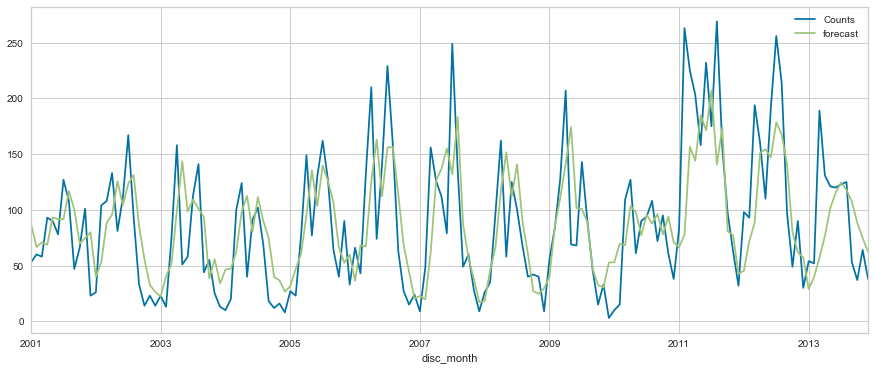

In [698]:
dti = pd.to_datetime("2001-01-01")
dtf = pd.to_datetime("2013-12-01")

df_ts['forecast'] = model_fit.predict(start=0,end=156, dynamic=False)
df_ts[['Counts', 'forecast']].loc[dti: dtf].plot()

### Sesonality and trend Analysis

In [693]:
# Rolling average and std

def test_stationarity(timeseries, window):
    #Determing rolling statistics
    rolmean=pd.Series.rolling(timeseries,window=window).mean()
    rolstd=pd.Series.rolling(timeseries,window=window).std()

    #plot rolling statistics
    orig=plt.plot(timeseries,color='b',label='Original')
    mean=plt.plot(rolmean,color='r',label='Rolling mean')
    std=plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard Deviatiom')
    plt.show(block=False)
 
    #Argumented Dickey_Fuller Test
    print('Resluts of Dickey-Fuller Test:')
    dftest= adfuller(timeseries, autolag='AIC')
    dfountput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','Number of obervations used'])

    for key, value in dftest[4].items():
        dfountput['Critical Value(%s)'%key]=value      
    print(dfountput)

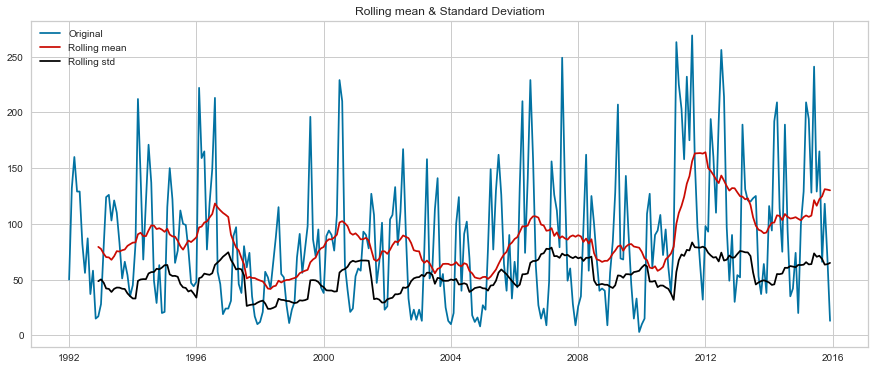

Resluts of Dickey-Fuller Test:
Test Statistic                 -3.427771
p-value                         0.010048
#lags used                     15.000000
Number of obervations used    272.000000
Critical Value(1%)             -3.454622
Critical Value(5%)             -2.872225
Critical Value(10%)            -2.572464
dtype: float64


In [694]:
test_stationarity(df_ts['Counts'], 12)

It shows the series has seasonality of 12-month period. Moving average is in line with the trend series of the original series. We use the seasonal desomposition to train ARIMA (differenc order d = 0) and removed the seasonal series. Moreover, we plot the error bound of the prediction based on the residue distribution.

Trend series.


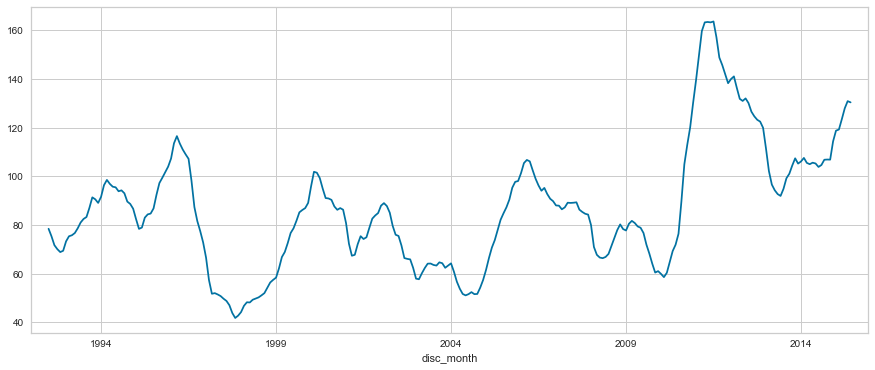

Seasonal series.


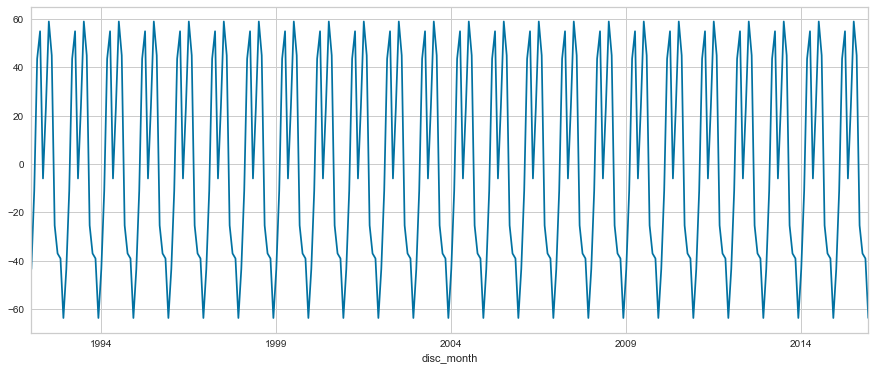

Residue series.


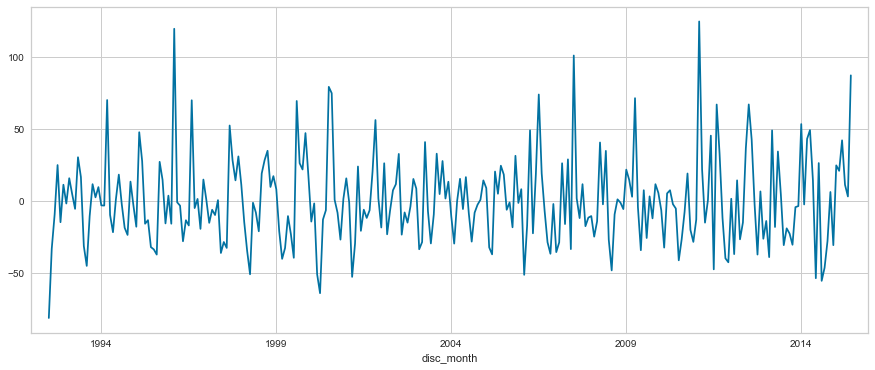

Error low bound = -54.622735507246375 and high bound = 50.47509057971016 derived from the distribution of residue from seasonal decomposition.


In [696]:
# trend decomposition
ts = df_ts['Counts']
decomposition = seasonal_decompose(ts, period = 12)
ts_trend = decomposition.trend
ts_seasonal = decomposition.seasonal
ts_resid = decomposition.resid
#ts_trend.count()

# time series has no trend
print('Trend series.')
ts_trend.plot()
plt.show()

# seasonal series
print('Seasonal series.')
ts_seasonal.plot()
plt.show()

# model residue error
print('Residue series.')
ts_resid.plot()
plt.show()
d_array = ts_resid.describe()
delta = d_array['75%'] - d_array['25%']
ts_low_error, ts_high_error = (d['25%'] - 1 * delta, d['75%'] + 1 * delta)
print(f'Error low bound = {ts_low_error} and high bound = {ts_high_error} derived from the distribution of residue from seasonal decomposition.')

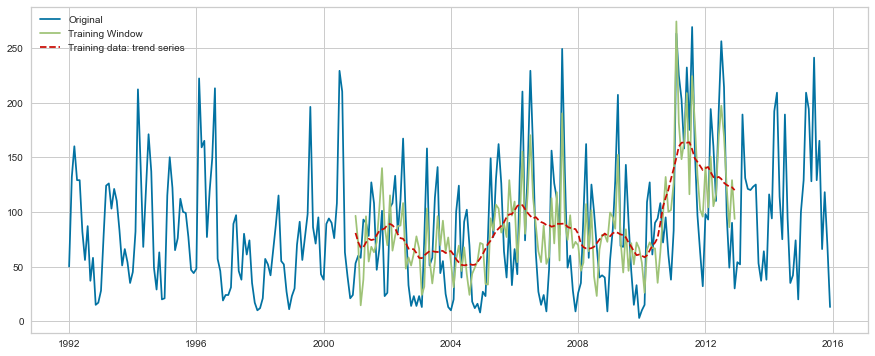

In [743]:
dti = pd.to_datetime("2001-01-01")
dtf = pd.to_datetime("2012-12-01")

ts_training = []
ts_training = ts_trend.add(ts_resid, fill_value=0).loc[dti: dtf]

plot_df = plt.plot(df_ts['Counts'], color='b',label = 'Original')
plot_ts = plt.plot(ts_training,color='g',label='Training Window')
plot_trend = plt.plot(ts_trend.loc[dti: dtf], 'r--', label='Training data: trend series')
#plot_resid = plt.plot(ts_resid.loc[dti: dtf], 'c--', label='Residue series')
plt.legend(loc='best')
plt.show()

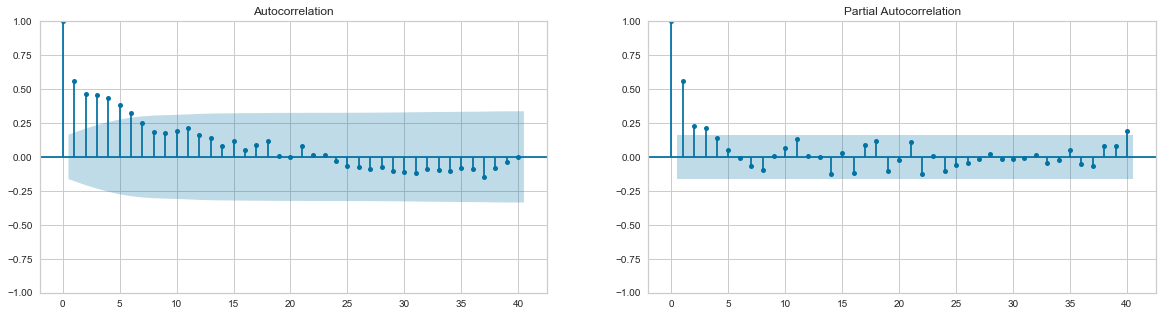

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:                 ARIMA(4, 0, 5)   Log Likelihood                -706.232
Date:                Wed, 01 Nov 2023   AIC                           1434.463
Time:                        13:13:59   BIC                           1467.131
Sample:                    01-01-2001   HQIC                          1447.738
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.4837     14.684      5.958      0.000      58.703     116.264
ar.L1          1.4673      0.137     10.743      0.000       1.200       1.735
ar.L2          0.0192      0.210      0.091      0.927      -0.393       0.431
ar.L3         -1.2924      0.228     -5.672      0.000      -1.739      -0.846
ar.L4          0.7405      0.129      5.735      0.000       0.487       0.994
ma.L1         -1.1469      4.330     -0.265      0.791      -9.634       7.340
ma.L2         -0.2958      3.877     -0.076      0.939      -7.895       7.303
ma.L3          1.3591      5.118      0.266      0.791      -8.672      11.390
ma.L4         -0.5414      3.352     -0.162      0.872      -7.111       6.028
ma.L5         -0.0771      0.421     -0.183      0.855      -0.903       0.749
sigma2      1009.7193   5596.351      0.180      0.857   -9958.927     1.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               111.64
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.55   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [733]:
lag_acf = acf(ts_training, nlags = 20)
lag_pacf = pacf(ts_training, nlags = 20, method = 'ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(ts_training, lags = 40, ax = axes[0])
plot_pacf(ts_training, lags = 40, ax = axes[1])
plt.show()

model = ARIMA(ts_training, order = (4,0,5))
model_fit=model.fit()
model_fit.summary()

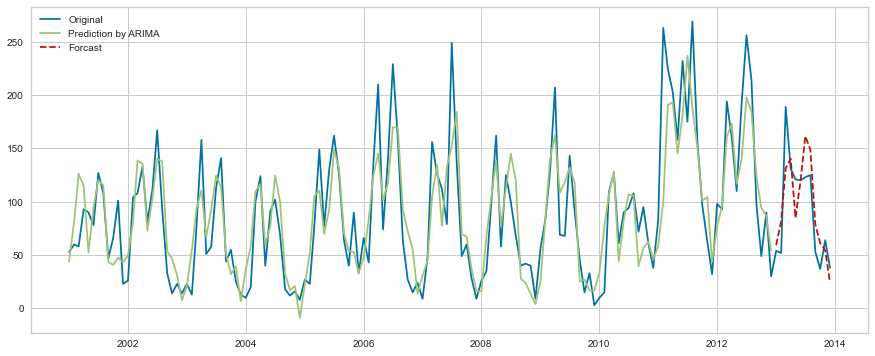

In [742]:
dti = pd.to_datetime("2001-01-01")
dtf = pd.to_datetime("2012-12-01")
ts_pred = model_fit.fittedvalues
ts_pred = ts_pred.add(ts_seasonal, fill_value=0).loc[dti: dtf]

dti = pd.to_datetime("2013-01-01")
dtf = pd.to_datetime("2013-12-01")
ts_forcast = model_fit.forecast(12)
ts_forcast = ts_forcast.add(ts_seasonal, fill_value=0).loc[dti: dtf]

dti = pd.to_datetime("2001-01-01")
dtf = pd.to_datetime("2013-12-01")
plot_df = plt.plot(df_ts['Counts'].loc[dti: dtf], color='b',label = 'Original')
plot_pred = plt.plot(ts_pred.loc[dti: dtf],color='g',label='Prediction by ARIMA')
plot_forcast = plt.plot(ts_forcast.loc[dti: dtf], 'r--', label='Forcast')
plt.legend(loc='best')
plt.show()


## SARIMAX for seasonal series and GridSearch for best order parameter

In [749]:
import itertools

dti = pd.to_datetime("2001-01-01")
dtf = pd.to_datetime("2012-12-01")
ts_training = ts = df_ts['Counts'].loc[dti: dtf]

# Grid Search for ARIMA
p = q = range(0,6)
d = range(0,2)
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q
combs = {} # stores aic and order parameter
aics = [] # stores aics
# Grid Search continued
for combination in pdq:
    try:
        model = ARIMA(ts_training, order=combination) # create all possible models
        model = model.fit()
        combs.update({model.aic : combination}) # store combinations
        aics.append(model.aic)
    except:
        continue
        
best_aic = min(aics)
# Model Creation and Forecasting
model = ARIMA(ts_training, order=combs[best_aic])
print(f'Best parameters {combs[best_aic]}, AIC {best_aic}')
model = model.fit()
model.forecast(12)

Best parameters (5, 1, 2), AIC 1506.1856742150744


2013-01-01     57.076860
2013-02-01     96.149326
2013-03-01    130.342407
2013-04-01    139.580384
2013-05-01    153.021744
2013-06-01    157.544112
2013-07-01    142.060462
2013-08-01    111.926862
2013-09-01     83.439188
2013-10-01     61.987335
2013-11-01     49.343333
2013-12-01     49.879795
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# Grid Search for SRIMA
p = q = range(0,6)
d = range(0,2)
pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
p2 = q2 = range(0, 3) # second set of p's, d's, and q's
d2 = range(0,2)
pdq2 = list(itertools.product(p2,d2,q2)) # simular too code above but for seasonal parameters
s = 12 # cycle of seasonal series is 12
pdqs2 = [(c[0], c[1], c[2], s) for c in pdq2]
combs = {}
aics = []
# Grid Search Continued
for combination in pdq:
    for seasonal_combination in pdqs2:
        try:
            model = sm.tsa.statespace.SARIMAX(ts_training, order=combination, seasonal_order=seasonal_combination,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            model = model.fit()
            combs.update({model.aic : [combination, seasonal_combination]})
            aics.append(model.aic)
            
        except:
            continue

In [770]:
best_aic = min(aics)
# Modeling and forcasting
model = sm.tsa.statespace.SARIMAX(ts_training, order=combs[best_aic][0], seasonal_order=combs[best_aic][1], enforce_stationarity=False, enforce_invertibility=False)
print(f'Best ARIMA order {combs[best_aic][0]}, best SRIMA order {combs[best_aic][1]}, best AIC {best_aic}')
model = model.fit()
ts_pred = model.fittedvalues
ts_forcast = model.forecast(36, dynamic=False)
ts_forcast_CI = model.get_prediction(start=pd.to_datetime('2013-01-01'), end=pd.to_datetime('2015-12-01'), dynamic=False).conf_int()

Best ARIMA order (1, 1, 5), best SRIMA order (1, 1, 2, 12), best AIC 1046.6998236140635
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62906D+00    |proj g|=  5.13496D-02


 This problem is unconstrained.



At iterate    5    f=  3.61854D+00    |proj g|=  1.37115D-02

At iterate   10    f=  3.61529D+00    |proj g|=  5.21322D-03

At iterate   15    f=  3.60158D+00    |proj g|=  4.47521D-02

At iterate   20    f=  3.58917D+00    |proj g|=  9.69268D-02

At iterate   25    f=  3.58621D+00    |proj g|=  1.96661D-02

At iterate   30    f=  3.58214D+00    |proj g|=  2.81724D-02

At iterate   35    f=  3.57764D+00    |proj g|=  3.45894D-02

At iterate   40    f=  3.56584D+00    |proj g|=  4.78259D-02

At iterate   45    f=  3.56504D+00    |proj g|=  2.51922D-02

At iterate   50    f=  3.56493D+00    |proj g|=  1.21067D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

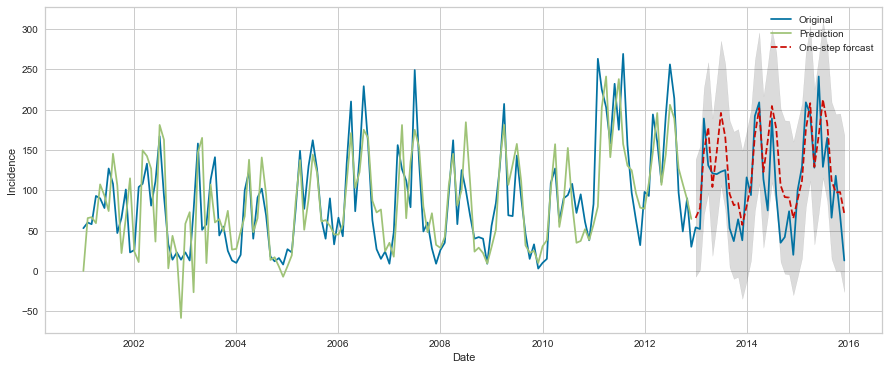

In [779]:
dti = pd.to_datetime("2001-01-01")
dtf = pd.to_datetime("2015-12-01")

fig, ax = plt.subplots()
plot_df = ax.plot(df_ts['Counts'].loc[dti: dtf], color='b',label = 'Original')
plot_pred = ax.plot(ts_pred,color='g',label='Prediction')
plot_forcast = ax.plot(ts_forcast, 'r--', label='One-step forcast')
ax.fill_between(ts_forcast_CI.index,
                ts_forcast_CI.iloc[:, 0],
                ts_forcast_CI.iloc[:, 1], color='k', alpha=.15)
ax.set_xlabel('Date')
ax.set_ylabel('Incidence')
ax.legend(loc='best')
plt.show()